In [77]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
np.random.seed(0)

In [80]:
df = pd.read_csv('submission.csv')

In [81]:
dataset_train = df.sample(n=20, random_state=0)

In [82]:
from sklearn.naive_bayes import GaussianNB as gnb

In [83]:
l = gnb()

In [84]:
l.fit(dataset_train[['x','y']], dataset_train['class'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [86]:
source = pd.DataFrame({'x': xx.ravel(),
                     'y': yy.ravel(),
                     'z': Z.ravel()})

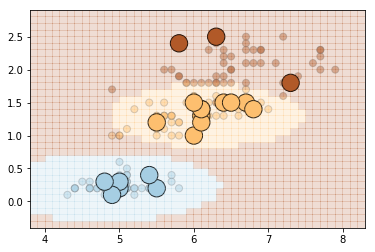

In [87]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [88]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

60

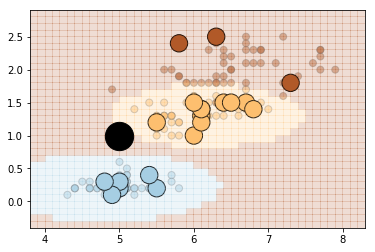

In [89]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [90]:
new_dataset_train = dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [91]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


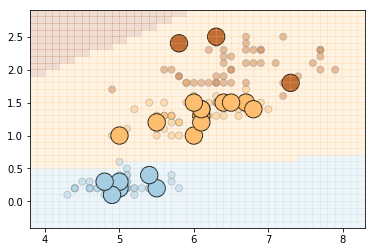

In [92]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [93]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

23

In [94]:
df.iloc[least_confident_ix]['class']

0.0

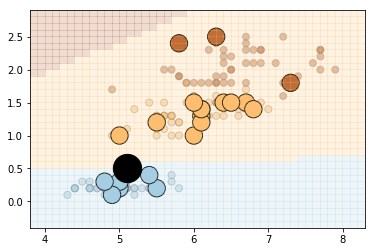

In [95]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [96]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [97]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


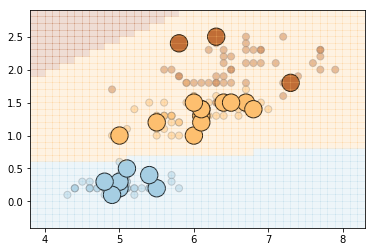

In [98]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [99]:
least_confident_ix = pd.DataFrame(l.predict_proba(df[['x','y']])).max(axis=1).idxmin()
least_confident_ix

43

In [100]:
df.iloc[least_confident_ix]['class']

0.0

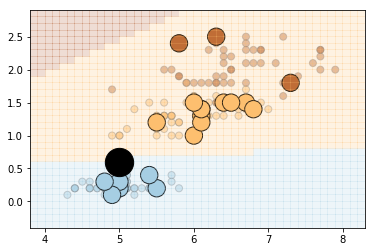

In [101]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(dataset_train['x'], dataset_train['y'], c= dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(df.iloc[least_confident_ix]['x'], df.iloc[least_confident_ix]['y'], c= 'k', 
            edgecolors='k', s=800, cmap=plt.cm.Paired )

In [102]:
new_dataset_train = new_dataset_train.append(df.iloc[least_confident_ix])
new_dataset_train

,x,y,class
114,5.8,2.4,2.0
62,6.0,1.0,1.0
33,5.5,0.2,0.0
107,7.3,1.8,2.0
7,5.0,0.2,0.0
100,6.3,2.5,2.0
40,5.0,0.3,0.0
86,6.7,1.5,1.0
76,6.8,1.4,1.0
71,6.1,1.3,1.0


In [103]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [104]:
l = LogisticRegression()
l.fit(new_dataset_train[['x','y']], new_dataset_train['class'])
x_min, x_max = df['x'].values.min() - .5, df['x'].max() + .5
y_min, y_max = df['y'].min() - .5, df['y'].max() + .5
h = 0.1  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = l.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gly\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


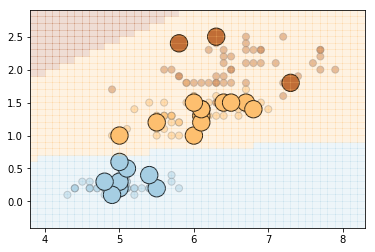

In [105]:
plt.scatter(df['x'], df['y'], c= df['class'], alpha=0.4, cmap=plt.cm.Paired, edgecolors='grey', s=50 )
plt.scatter(new_dataset_train['x'], new_dataset_train['y'], c= new_dataset_train['class'], 
            edgecolors='k', s=300, cmap=plt.cm.Paired )
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)